# Cipher Decryption with Genetic Algorithms

All the modules has been built in model directory

In [1]:
import os
os.chdir("..")
from model.genetic_algorithm import GeneticAlgorithm
from model.language_model import LanguageModel
from model.encoder import Encoder
import re
import matplotlib.pyplot as plt

initialize genetic algorithm object and train

In [2]:
original_message = """I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
"""

In [3]:
print(original_message)

I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.



train the encryption mapping

In [4]:
g = GeneticAlgorithm()
encoder = Encoder()
lm = LanguageModel()
g.train(original_message)


 iter: 0, log likelihood: -2073.576252028433, best likelihood so far: -1832.381645653613 
 decoded_message: 
 i swzl bdxloza adfl swz rsyzzs ela udxla  er i znpzmsza  swes swzyz fer e czfr il e belz fwimw yxlr adfl jq dlz febb du swz oeyazl  i bzls swz drsbzyr e wela il yxjjilo adfl swziy wdyrzr  ela yzmzivza il znmweloz sfdpzlmz  e oberr du webu ela webu  sfd uibbr du rweo sdjemmd  ela er cxmw iludycesidl er i mdxba azriyz ejdxs cirr eabzy  sd req ldswilo du webu e adkzl dswzy pzdpbz il swz lziowjdxywdda il fwdc i fer lds il swz bzers ilszyzrsza  jxs fwdrz jidoyepwizr i fer mdcpzbbza sd birszl sd   


 iter: 50, log likelihood: -1387.9634836444652, best likelihood so far: -1151.0213450523797 
 decoded_message: 
 i lyen pokndet tomn lye rlfeel ant uoknt  ar i ewheblet  lyal lyefe mar a cemr in a pane myiby fknr tomn sg one mapp ou lye daften  i penl lye orlpefr a yant in fkssind tomn lyeif yofrer  ant febeivet in ewbyande lmohenbe  a dparr ou yapu ant yapu  lmo uippr ou ryad losabbo  

As shown, the encryption mapping is getting increasingly accurate to the real message

get the best mapping and compare with the true mapping

In [5]:
best_mapping = g.best_mapping
true_mapping = encoder.encoder_cipher_mapping
encoded_message = encoder.encode(original_message)
decoded_message = encoder.decode(encoded_message, best_mapping)

print("LL of decoded message:", lm.get_sentence_log_probability(decoded_message))
print("LL of true message:", lm.get_sentence_log_probability(re.sub("[^a-zA-Z]", " ", original_message.lower())))


# which letters are wrong?
for true, v in true_mapping.items():
    pred = best_mapping[v]
    if true != pred:
        print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -929.5902922650557
LL of true message: -933.0312453751817
true: k, pred: z
true: z, pred: k


The only pair of mapping that the algorithm did not get properly mapped - since "o -> k" is much more common than "o -> z", therefore that "o -> k" combination produced a larger likelihood that got maximized by the algorithm 

visualize the training progression

Text(0, 0.5, 'Log Likelihood')

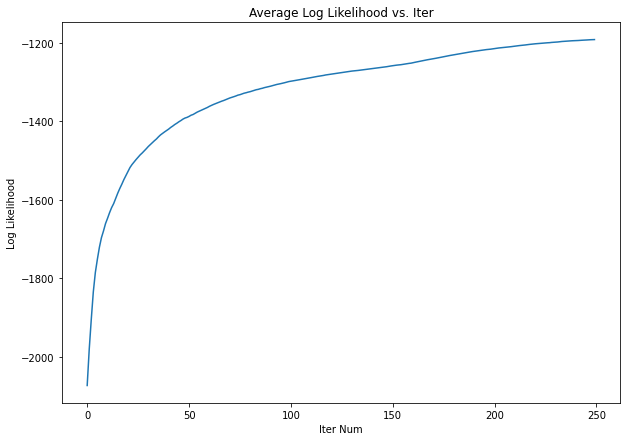

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(g.avg_scores_per_iter)
plt.title("Average Log Likelihood vs. Iter")
plt.xlabel("Iter Num")
plt.ylabel("Log Likelihood")

Text(0, 0.5, 'Log Likelihood')

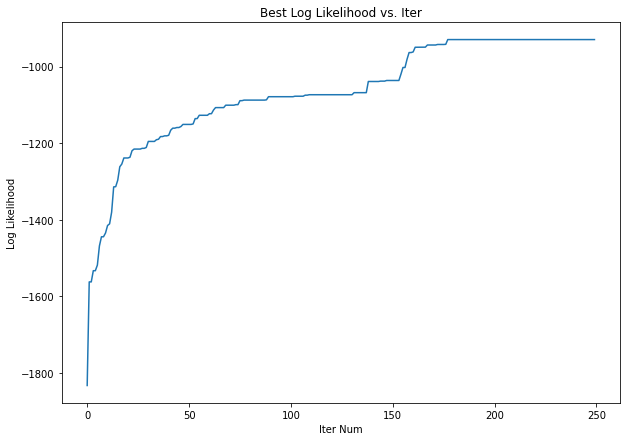

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(g.best_scores_per_iter)
plt.title("Best Log Likelihood vs. Iter")
plt.xlabel("Iter Num")
plt.ylabel("Log Likelihood")